# Testing the lambda handler

In [16]:
# !uv export --format=requirements.txt --no-hashes --no-annotate --no-header > temp_requirements
# !uv pip install -r temp_requirements

Resolved 88 packages in 1ms
Using Python 3.11.10 environment at: /opt/conda
Audited 87 packages in 17ms


In [4]:
!echo $JUPYTER_IMAGE_SPEC

quay.io/developmentseed/veda-optimized-data-delivery-image:52f4f7827092


In [5]:
from lambda_function import lambda_handler, open_icechunk_repo
import earthaccess
import os
import xarray as xr
import zarr

import warnings
warnings.filterwarnings("ignore") 

In [8]:
# Deactivate writing and secrets logic (needs EDL env or netrc authentication available)
os.environ['DRY_RUN'] = "true"
os.environ['LOCAL_TEST'] = "true"

In [9]:
lambda_handler({})

LOCAL TEST detected. You need to set EDL login/password manually
Received event: {}
opening icechunk repo
Getting last timestep
Searching for granules between 2025-07-19 09:00:00 21:00:01 and 2025-07-21 21:00:00
Number of granules found: 1
opening virtual dataset
New Data (Virtual): <xarray.Dataset> Size: 6GB
Dimensions:           (time: 1, lat: 17999, lon: 36000)
Coordinates:
    time              (time) int32 4B ManifestArray<shape=(1,), dtype=int32, ...
    lat               (lat) float32 72kB ManifestArray<shape=(17999,), dtype=...
    lon               (lon) float32 144kB ManifestArray<shape=(36000,), dtype...
Data variables:
    mask              (time, lat, lon) int8 648MB ManifestArray<shape=(1, 179...
    sea_ice_fraction  (time, lat, lon) int8 648MB ManifestArray<shape=(1, 179...
    dt_1km_data       (time, lat, lon) int8 648MB ManifestArray<shape=(1, 179...
    analysed_sst      (time, lat, lon) int16 1GB ManifestArray<shape=(1, 1799...
    analysis_error    (time, lat, lon

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Testing Time continuity
Testing Data equality
Tests did not pass with: Failures:
- Time continuity failed: cannot reindex or align along dimension 'time' because the (pandas) index has duplicate values



{'statusCode': 200,
 'body': '"Successfully processed messages: Failures:\\n- Time continuity failed: cannot reindex or align along dimension \'time\' because the (pandas) index has duplicate values\\n"'}

## Look at the state of the store on main 

In [10]:
import icechunk as ic
from lambda_function import open_icechunk_repo, open_xr_dataset_from_branch

repo = open_icechunk_repo('nasa-eodc-public', "MUR-JPL-L4-GLOB-v4.1-virtual-v1-p2")
ds = open_xr_dataset_from_branch(repo, 'main')
ds

opening icechunk repo


error: Error -3 while decompressing data: incorrect header check

In [13]:
for snapshot in repo.ancestry(branch="main"):
    print(snapshot)
    print(snapshot.message)

SnapshotInfo(id="7NZ9A28JRFFTHB1PJ6E0", parent_id=85PSS72XMEQF0K2HTN80, written_at=datetime.datetime(2025,7,18,14,0,56,59237, tzinfo=datetime.timezone.utc), message="Committed ...")
Committed data for 2025-07-15T21:00:00.000Z to 2025-07-17T21:00:00.000Z.
SnapshotInfo(id="85PSS72XMEQF0K2HTN80", parent_id=44B9XPA2C0QH6FVT5AF0, written_at=datetime.datetime(2025,7,16,17,27,59,291089, tzinfo=datetime.timezone.utc), message="Committed ...")
Committed data for 2025-05-31 09:00:00 21:00:01 to 2025-07-16 21:00:00.
SnapshotInfo(id="44B9XPA2C0QH6FVT5AF0", parent_id=GPRDBT2XK9ZERYSQ7EA0, written_at=datetime.datetime(2025,6,21,16,50,51,27948, tzinfo=datetime.timezone.utc), message="Removed da...")
Removed data for time > 2025-05-31
SnapshotInfo(id="GPRDBT2XK9ZERYSQ7EA0", parent_id=CP5PHVT9V88VPZTZ0E00, written_at=datetime.datetime(2025,6,5,21,43,26,708030, tzinfo=datetime.timezone.utc), message="Commit dat...")
Commit data 2024-10-01 to 2025-06-04
SnapshotInfo(id="CP5PHVT9V88VPZTZ0E00", parent_id=W

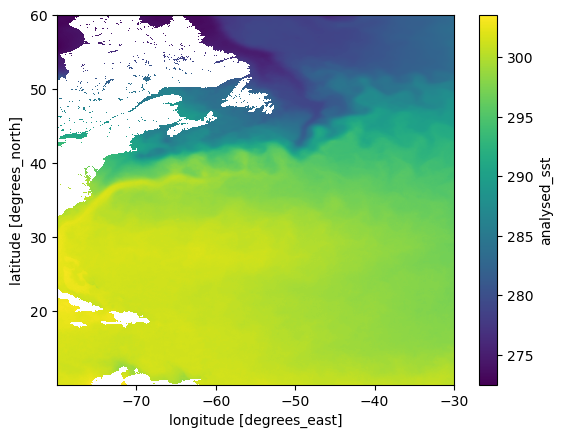

In [12]:
ds.isel(time=slice(-40, None), lon=slice(10000, 15000), lat=slice(10000, 15000)).mean('time')['analysed_sst'].plot()

## Testing intermediate steps in the 
Mostly a leftover from previous debugging, but might still be helpful in the future

In [7]:
import icechunk as ic
from lambda_function import open_icechunk_repo

repo = open_icechunk_repo('nasa-eodc-public', "MUR-JPL-L4-GLOB-v4.1-virtual-v1-p2")
repo

opening icechunk repo


In [9]:
repo.

{'add_time_2025-07-10T23:29:18.786913+00:00',
 'add_time_2025-07-10T23:36:45.945500+00:00',
 'add_time_2025-07-10T23:38:12.453998+00:00',
 'add_time_2025-07-10T23:40:37.782580+00:00',
 'add_time_2025-07-10T23:44:20.720212+00:00',
 'add_time_2025-07-10T23:47:36.497484+00:00',
 'add_time_2025-07-11T00:09:47.540006+00:00',
 'add_time_2025-07-11T00:11:30.066167+00:00',
 'add_time_2025-07-11T00:13:05.655129+00:00',
 'add_time_2025-07-11T00:44:24.379583+00:00',
 'add_time_2025-07-11T00:45:45.289818+00:00',
 'add_time_2025-07-11T00:57:31.165313+00:00',
 'add_time_2025-07-11T01:19:21.826321+00:00',
 'add_time_2025-07-11T15:35:07.901993+00:00',
 'add_time_2025-07-17T14:37:37.744808+00:00',
 'add_time_2025-07-17T18:32:57.145805+00:00',
 'add_time_2025-07-17T18:36:48.707989+00:00',
 'add_time_2025-07-17T18:51:18.407001+00:00',
 'add_time_2025-07-17T19:39:51.406396+00:00',
 'add_time_2025-07-17T20:05:07.225914+00:00',
 'add_time_2025-07-17T20:11:20.586445+00:00',
 'add_time_2025-07-17T20:26:40.926

In [6]:
repo.list_branches()

{'add_time_2025-07-10T23:29:18.786913+00:00',
 'add_time_2025-07-10T23:36:45.945500+00:00',
 'add_time_2025-07-10T23:38:12.453998+00:00',
 'add_time_2025-07-10T23:40:37.782580+00:00',
 'add_time_2025-07-10T23:44:20.720212+00:00',
 'add_time_2025-07-10T23:47:36.497484+00:00',
 'add_time_2025-07-11T00:09:47.540006+00:00',
 'add_time_2025-07-11T00:11:30.066167+00:00',
 'add_time_2025-07-11T00:13:05.655129+00:00',
 'add_time_2025-07-11T00:44:24.379583+00:00',
 'add_time_2025-07-11T00:45:45.289818+00:00',
 'add_time_2025-07-11T00:57:31.165313+00:00',
 'add_time_2025-07-11T01:19:21.826321+00:00',
 'add_time_2025-07-11T15:35:07.901993+00:00',
 'main'}

In [3]:
from lambda_function import open_xr_dataset_from_branch
ds = open_xr_dataset_from_branch(repo,'add_time_2025-07-11T00:13:05.655129+00:00')
ds

/opt/conda/lib/python3.11/site-packages/numcodecs/zarr3.py:133: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/opt/conda/lib/python3.11/site-packages/numcodecs/zarr3.py:133: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/opt/conda/lib/python3.11/site-packages/numcodecs/zarr3.py:133: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/opt/conda/lib/python3.11/site-packages/numcodecs/zarr3.py:133: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/opt/conda/lib/python3.11/site-packages/numcodecs/zarr3.py:133: UserWarning: Numcode

<xarray.Dataset> Size: 7TB
Dimensions:           (time: 403, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 3kB 2024-06-02T09:00:00 ... 2025-...
Data variables:
    analysis_error    (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 2TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    mask              (time, lat, lon) float32 1TB dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [5]:
from lambda_function import find_granules

granules = find_granules(repo)
granules

direct_access_links = [granule.data_links(access="direct")[0] for granule in granules]

Getting last timestep
Searching for granules
Number of granules found: 39


In [8]:
import earthaccess
import xarray as xr

fileset = earthaccess.open(direct_access_links, provider='POCLOUD')

og_ds = xr.open_mfdataset(fileset, chunks={})

QUEUEING TASKS | :   0%|          | 0/39 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/39 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/39 [00:00<?, ?it/s]

/tmp/ipykernel_22567/953973743.py:6: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  og_ds = xr.open_mfdataset(fileset, chunks={})
/tmp/ipykernel_22567/953973743.py:6: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To conti

In [ ]:
og_ds = og_ds.isel(time=slice(-3,None))

In [13]:
xr.testing.assert_allclose(og_ds, ds.isel(time=slice(-len(og_ds.time),None)))

KeyboardInterrupt: 

In [16]:
nt=40
dt_expected = ds.time.isel(time=slice(0, 1)).diff('time')
dt_actual = ds.time.isel(time=slice(-nt+1, None)).diff('time')
time_continuity = (dt_actual == dt_expected).all().item()
time_continuity


True

# Testing the store

In [9]:
earthaccess.login()
ea_creds = earthaccess.get_s3_credentials(daac='PODAAC')
bucket = 'nasa-eodc-public'
store_name = "MUR-JPL-L4-GLOB-v4.1-virtual-v1-p2"
lat_slice = slice(47.6, 47.7)
lon_slice = slice(-122.4, -122.3)

In [11]:
time_range = ["2025-06-30", "2025-07-02"]

### Get a value from the icechunk store

In [13]:
import icechunk as ic
from lambda_function import 


storage = ic.s3_storage(
    bucket=bucket,
    prefix=f"icechunk/{store_name}",
    anonymous=False,
    from_env=True # cannot auth with EDL
)
config = ic.RepositoryConfig.default()
config.set_virtual_chunk_container(ic.VirtualChunkContainer(
# ic.Repository.open(storage=storage)

# config = icechunk.RepositoryConfig.default()
# config.set_virtual_chunk_container(icechunk.VirtualChunkContainer("s3", "s3://", icechunk.s3_store(region="us-west-2")))

# repo_config = dict(
#     storage=storage,
#     config=config,
# )

# if ea_creds:
#     earthdata_credentials = icechunk.containers_credentials(
#         s3=icechunk.s3_refreshable_credentials(get_credentials=get_icechunk_creds),
#     )
#     repo_config['virtual_chunk_credentials'] = earthdata_credentials
# print('repo_config', repo_config)
# return icechunk.Repository.open(**repo_config)

In [ ]:
repo = open_icechunk_repo(bucket, store_name, ea_creds)
session = repo.readonly_session(branch="main")
xds = xr.open_zarr(session.store, zarr_version=3, chunks={}, consolidated=False)

In [ ]:
slice(*time_range)

In [ ]:
(time_range[0] + " 09:00:00", time_range[1] + " 09:00:00")

In [ ]:
xds

In [ ]:
subset = xds.sel(lat=lat_slice, lon=lon_slice, time='2025-07-01')
print(subset.analysed_sst.shape)
subset.analysed_sst.mean().values

### Get same value from original data

In [ ]:
results = earthaccess.search_data(
    short_name='MUR-JPL-L4-GLOB-v4.1',
    temporal=(time_range[0] + " 09:00:00", time_range[1] + " 09:00:00"),
)

direct_access_links = [granule.data_links(access="direct")[0] for granule in results]

fileset = earthaccess.open(direct_access_links, provider='POCLOUD')

og_ds = xr.open_mfdataset(fileset)

In [ ]:
og_subset = og_ds.sel(lat=lat_slice, lon=lon_slice, time=slice(*time_range))
print(og_subset.analysed_sst.shape)
og_subset.analysed_sst.mean().values

# Deleting data

You can delete data directly if necessary or remove previous commits.

### Option 1: first option resizes the arrays.

In [ ]:
session = repo.writable_session(branch="main")
store = session.store
variables = ["analysed_sst", "analysis_error", "sea_ice_fraction", "mask", "time"]
resize = 364
for var in variables:
    # Open your array
    group = zarr.open_group(store)
    array = group[var]
    
    # Truncate the array to remove time indices > 364
    # This effectively removes chunks for indices 365, 366, etc.
    new_shape = list(array.shape)
    new_shape[0] = 364  # Assuming time is the first dimension
    array.resize(new_shape)

In [ ]:
# DANGER!
# session.commit("Removed data for time > 2025-05-31")

### Option 2: Reset to a previous commit.

First list commits:

In [ ]:
[(ancestor.message, ancestor.id) for ancestor in repo.ancestry(branch="main")]

In [24]:
# repo.reset_branch("main", "8Y9Z9XA2B9VF3NVNJ1J0")